In [69]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [70]:
hra=pd.read_csv('file:///D:/Data%20Science%20&%20AI/Data%20Science/Projects/Pending_Projects/HR-analytics-main/HR_comma_sep.csv')
print('Total values before remove duplicates',hra.shape)
#hra=hra.drop_duplicates()
print('Total values after remove duplicates',hra.shape)

Total values before remove duplicates (14999, 10)
Total values after remove duplicates (14999, 10)


In [71]:
hra.tail(10)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
14989,0.43,0.57,2,159,3,1,1,0,technical,low
14990,0.89,0.88,5,228,5,1,1,0,support,low
14991,0.09,0.81,6,257,4,0,1,0,support,low
14992,0.40,0.48,2,155,3,0,1,0,support,low
14993,0.76,0.83,6,293,6,0,1,0,support,low
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low
14998,0.37,0.52,2,158,3,0,1,0,support,low


# Define Problem

# Distribution Check

<AxesSubplot:>

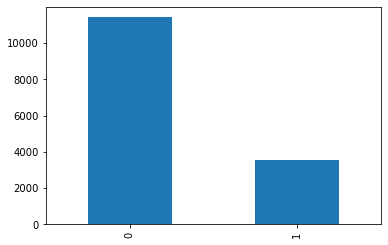

In [72]:
hra['left'].value_counts().plot(kind='bar')

# Basic Analysis

In [73]:
hra.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [74]:
hra.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [75]:
hra.nunique()

satisfaction_level        92
last_evaluation           65
number_project             6
average_montly_hours     215
time_spend_company         8
Work_accident              2
left                       2
promotion_last_5years      2
Department                10
salary                     3
dtype: int64

# Identity different types of attributes

# Visual Exploratory Data Analysis

In [76]:
def plotbarcharts(inpdata,colstoplot):
    import matplotlib.pyplot as plt
    fig,subPlot=plt.subplots(nrows=1,ncols=len(colstoplot),figsize=(18,10))
    fig.suptitle('Bar charts of:'+ str(colstoplot))
    for colname,plotnumber in zip(colstoplot,range(len(colstoplot))):
        inpdata.groupby(colname).size().plot(kind='bar',ax=subPlot[plotnumber])
    

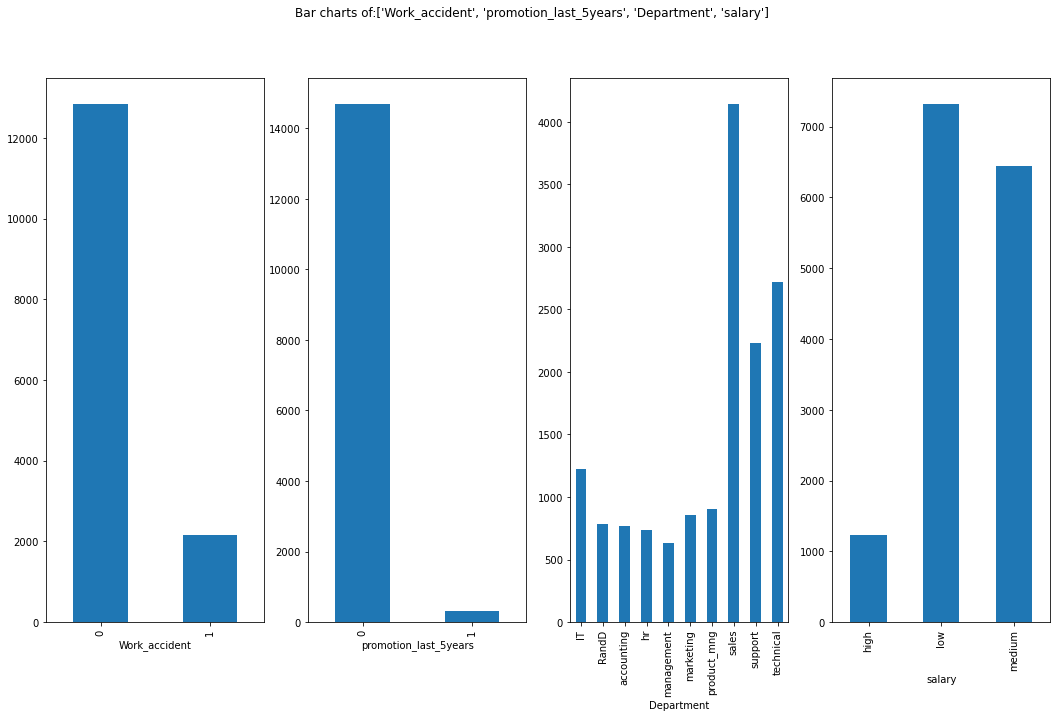

In [77]:
plotbarcharts(inpdata=hra,colstoplot=['Work_accident','promotion_last_5years','Department','salary'])

In [78]:
hra.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Department', 'salary'],
      dtype='object')

array([[<AxesSubplot:title={'center':'satisfaction_level'}>,
        <AxesSubplot:title={'center':'last_evaluation'}>],
       [<AxesSubplot:title={'center':'number_project'}>,
        <AxesSubplot:title={'center':'average_montly_hours'}>],
       [<AxesSubplot:title={'center':'time_spend_company'}>,
        <AxesSubplot:>]], dtype=object)

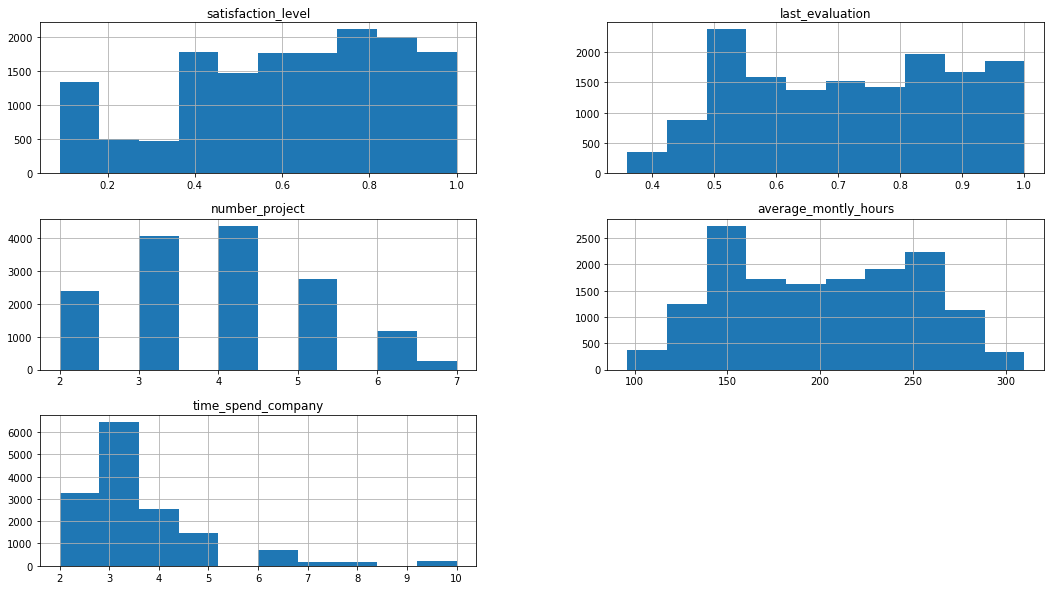

In [79]:
hra.hist(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company'],figsize=(18,10))

# Outlier  Identification & Treatment

IQR CHECK

In [80]:
IQR = hra.time_spend_company.quantile(0.75) - hra.time_spend_company.quantile(0.25)
Lower_fence = hra.time_spend_company.quantile(0.25) - (IQR * 3)
Upper_fence = hra.time_spend_company.quantile(0.75) + (IQR * 3)
print(f'time_spend_company outliers are values < {Lower_fence} or > {Upper_fence}')

time_spend_company outliers are values < 0.0 or > 7.0


In [81]:
len(hra[hra["time_spend_company"]>7.0])

376

In [82]:
hra['time_spend_company'][hra['time_spend_company']<11].sort_values(ascending=False)

11630    10
11230    10
13742    10
11232    10
13741    10
         ..
10919     2
10916     2
5522      2
5523      2
7499      2
Name: time_spend_company, Length: 14999, dtype: int64

For time_spend_company minimum value is 2 and maximum is 10

In [83]:
hra['time_spend_company'][hra['time_spend_company']>7]=7

<AxesSubplot:>

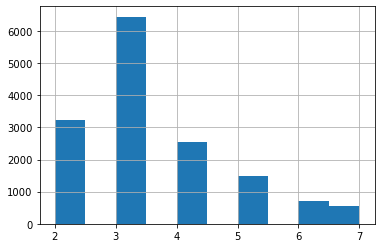

In [84]:
hra['time_spend_company'].hist()

# Checking Multicollinearity

In [85]:
hra[['satisfaction_level', 'last_evaluation', 'number_project', 'average_montly_hours', 'time_spend_company','Work_accident',
         'promotion_last_5years','Department','salary']].corr()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years
satisfaction_level,1.000000,0.105021,-0.142970,-0.020048,-0.123454,0.058697,0.025605
last_evaluation,0.105021,1.000000,0.349333,0.339742,0.148393,-0.007104,-0.008684
number_project,-0.142970,0.349333,1.000000,0.417211,0.229614,-0.004741,-0.006064
average_montly_hours,-0.020048,0.339742,0.417211,1.000000,0.149276,-0.010143,-0.003544
time_spend_company,-0.123454,0.148393,0.229614,0.149276,1.000000,-0.009161,0.062615
Work_accident,0.058697,-0.007104,-0.004741,-0.010143,-0.009161,1.000000,0.039245
promotion_last_5years,0.025605,-0.008684,-0.006064,-0.003544,0.062615,0.039245,1.000000


In [86]:
hra['Department'].unique()

array(['sales', 'accounting', 'hr', 'technical', 'support', 'management',
       'IT', 'product_mng', 'marketing', 'RandD'], dtype=object)

In [87]:
hra1 = pd.get_dummies(hra, columns = ['Department','salary'])

In [88]:
hra1.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department_IT,Department_RandD,...,Department_hr,Department_management,Department_marketing,Department_product_mng,Department_sales,Department_support,Department_technical,salary_high,salary_low,salary_medium
0,0.38,0.53,2,157,3,0,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0
1,0.80,0.86,5,262,6,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,1
2,0.11,0.88,7,272,4,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,1
3,0.72,0.87,5,223,5,0,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0
4,0.37,0.52,2,159,3,0,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0


In [89]:
hra1.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Department_IT', 'Department_RandD',
       'Department_accounting', 'Department_hr', 'Department_management',
       'Department_marketing', 'Department_product_mng', 'Department_sales',
       'Department_support', 'Department_technical', 'salary_high',
       'salary_low', 'salary_medium'],
      dtype='object')

# Model Summary

In [90]:
X=hra1[['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident',
       'promotion_last_5years', 'Department_IT', 'Department_RandD',
       'Department_accounting', 'Department_hr', 'Department_management',
       'Department_marketing', 'Department_product_mng', 'Department_sales',
       'Department_support', 'Department_technical', 'salary_high',
       'salary_low', 'salary_medium']]
Y=hra1['left']

In [91]:
import statsmodels.api as sm
X=sm.add_constant(X)
model=sm.OLS(Y,X).fit()

In [92]:
X=sm.add_constant(X)

In [93]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   left   R-squared:                       0.225
Model:                            OLS   Adj. R-squared:                  0.224
Method:                 Least Squares   F-statistic:                     241.5
Date:                Wed, 09 Nov 2022   Prob (F-statistic):               0.00
Time:                        11:28:28   Log-Likelihood:                -6569.8
No. Observations:               14999   AIC:                         1.318e+04
Df Residuals:                   14980   BIC:                         1.332e+04
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      0.2635      0.013     19.987      0.000       0.238       0.289
satisfaction_level        -0.6331      0.013    -49.610      0.000      -0.658      -0.608
last_evaluation            0.0771      0.020      3.862      0.000       0.038       0.116
number_project            -0.0372      0.003    -12.804      0.000      -0.043      -0.031
average_montly_hours       0.0006   6.94e-05      8.887      0.000       0.000       0.001
time_spend_company         0.0542      0.003     21.500      0.000       0.049       0.059
Work_accident             -0.1538      0.009    -17.604      0.000      -0.171      -0.137
promotion_last_5years     -0.1182      0.022     -5.470      0.000      -0.161      -0.076
Department_IT              0.0157      0.010      1.512      0.130      -0.005       0.036
Department_RandD          -0.0340      0.013     -2.695      0.007      -0.059      -0.009
Department_accounting      0.0412      0.013      3.228      0.001       0.016       0.066
Department_hr              0.0753      0.013      5.807      0.000       0.050       0.101
Department_management     -0.0205      0.014     -1.419      0.156      -0.049       0.008
Department_marketing       0.0376      0.012      3.098      0.002       0.014       0.061
Department_product_mng     0.0165      0.012      1.386      0.166      -0.007       0.040
Department_sales           0.0351      0.006      5.452      0.000       0.022       0.048
Department_support         0.0480      0.008      5.939      0.000       0.032       0.064
Department_technical       0.0487      0.007      6.500      0.000       0.034       0.063
salary_high               -0.0168      0.009     -1.810      0.070      -0.035       0.001
salary_low                 0.1796      0.006     28.999      0.000       0.167       0.192
salary_medium              0.1008      0.006     15.807      0.000       0.088       0.113
==============================================================================
Omnibus:                     1207.799   Durbin-Watson:                   0.411
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1362.243
Skew:                           0.707   Prob(JB):                    1.56e-296
Kurtosis:                       2.577   Cond. No.                     2.96e+18
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 7.34e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [94]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [95]:
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns

In [96]:
vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]

In [97]:
print(vif_data)

                   feature       VIF
0                    const  0.000000
1       satisfaction_level  1.072390
2          last_evaluation  1.244055
3           number_project  1.363617
4     average_montly_hours  1.280144
5       time_spend_company  1.091790
6            Work_accident  1.006177
7    promotion_last_5years  1.035369
8            Department_IT       inf
9         Department_RandD       inf
10   Department_accounting       inf
11           Department_hr       inf
12   Department_management       inf
13    Department_marketing       inf
14  Department_product_mng       inf
15        Department_sales       inf
16      Department_support       inf
17    Department_technical       inf
18             salary_high       inf
19              salary_low       inf
20           salary_medium       inf


There is no multi collineairty present in this dataset

# Missing Values

In [98]:
hra.isnull().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
Department               0
salary                   0
dtype: int64

No missing values found

# Feature Selection

In [99]:
hra.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Department', 'salary'],
      dtype='object')

In [100]:
Continouscolist=['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company']

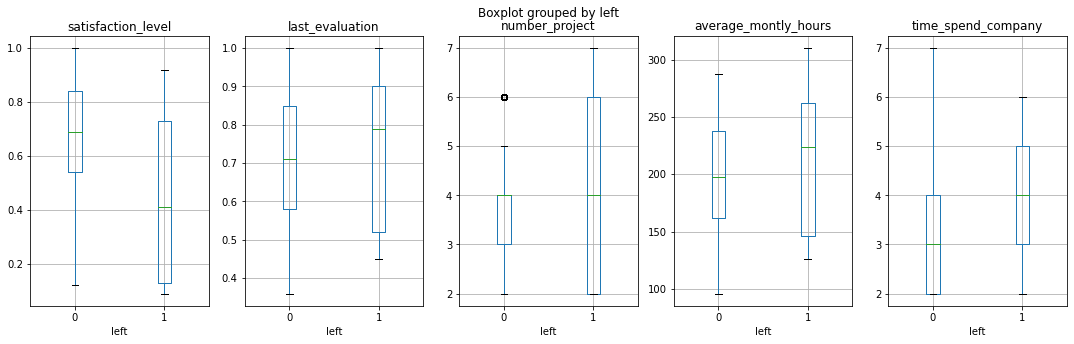

In [101]:
import matplotlib.pyplot as plt
fig,plotcanvas=plt.subplots(nrows=1,ncols=len(Continouscolist),figsize=(18,5))

for h,i in zip(Continouscolist,range(len(Continouscolist))):
    hra.boxplot(column=h,by='left',figsize=(5,5),vert=True,ax=plotcanvas[i])


# Statistical Feature Selection (Categorical Vs Continuous) using ANOVA test

In [102]:
def funtionanova(inpdata,targetV,contcollist):
    from scipy.stats import f_oneway
    
    selectpredictorlist=[]
    
    for predictor in contcollist:
        categorygroupby=inpdata.groupby(targetV)[predictor].apply(list)
        annova_results=f_oneway(*categorygroupby)
        
        if(annova_results[1]<0.05):
            print(predictor, 'is correlated with', targetV, '| P-Value:', annova_results[1])
            selectpredictorlist.append(predictor)
        else:
            print(predictor, 'is NOT correlated with', targetV, '| P-Value:', annova_results[1])
    
    return(selectpredictorlist)

In [103]:
cont=['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company']
funtionanova(inpdata=hra,targetV='left', contcollist=cont)

satisfaction_level is correlated with left | P-Value: 0.0
last_evaluation is NOT correlated with left | P-Value: 0.4212701963753548
number_project is correlated with left | P-Value: 0.0035752138709336566
average_montly_hours is correlated with left | P-Value: 2.3113035567460063e-18
time_spend_company is correlated with left | P-Value: 6.164247414582264e-122


['satisfaction_level',
 'number_project',
 'average_montly_hours',
 'time_spend_company']

Final Selected Columns

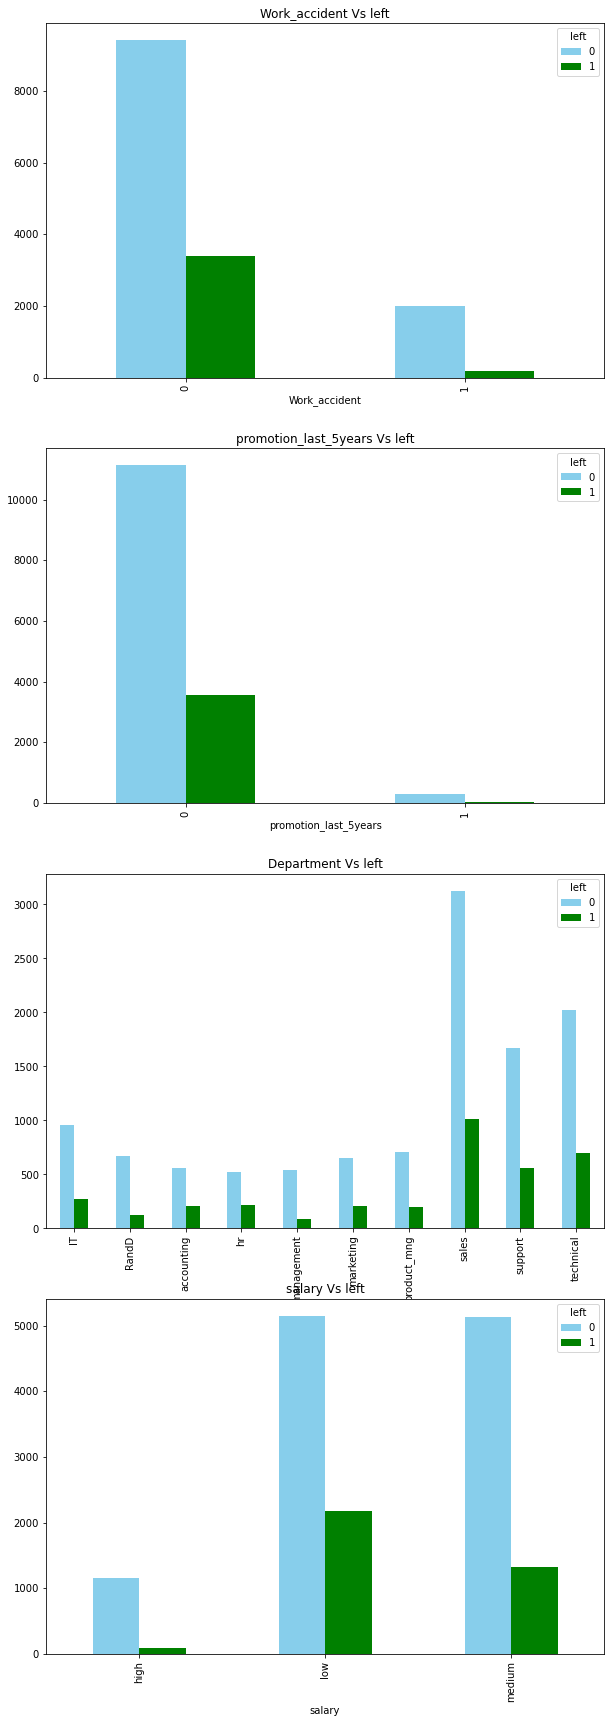

In [104]:
CategoricalColsList=['Work_accident','promotion_last_5years','Department','salary']

import matplotlib.pyplot as plt
fig, PlotCanvas=plt.subplots(nrows=len(CategoricalColsList), ncols=1, figsize=(10,30))

for CategoricalCol , i in zip(CategoricalColsList, range(len(CategoricalColsList))):
    CrossTabResult=pd.crosstab(index=hra[CategoricalCol], columns=hra['left'])
    CrossTabResult.plot.bar(color=['skyblue','green'], ax=PlotCanvas[i], title=CategoricalCol+' Vs '+'left')

# Statistical Feature Selection (Categorical Vs Categorical) using Chi-Square Test

In [105]:
def FunctionChisq(inpData, TargetVariable, CategoricalVariablesList):
    from scipy.stats import chi2_contingency
    
   
    SelectedPredictors=[]

    for predictor in CategoricalVariablesList:
        CrossTabResult=pd.crosstab(index=inpData[TargetVariable], columns=inpData[predictor])
        ChiSqResult = chi2_contingency(CrossTabResult)
        
        if (ChiSqResult[1] < 0.05):
            print(predictor, 'is correlated with', TargetVariable, '| P-Value:', ChiSqResult[1])
            SelectedPredictors.append(predictor)
        else:
            print(predictor, 'is NOT correlated with', TargetVariable, '| P-Value:', ChiSqResult[1])        
            
    return(SelectedPredictors)

In [106]:
CategoricalVariables=['Work_accident','promotion_last_5years','Department','salary']
FunctionChisq(inpData=hra, 
              TargetVariable='left',
              CategoricalVariablesList= CategoricalVariables)

Work_accident is correlated with left | P-Value: 9.55823958002199e-80
promotion_last_5years is correlated with left | P-Value: 6.344155457918697e-14
Department is correlated with left | P-Value: 7.042130463822568e-15
salary is correlated with left | P-Value: 1.652086749296005e-83


['Work_accident', 'promotion_last_5years', 'Department', 'salary']

# Selecting final predictors for Machine Learning

In [107]:
FinalCols=['Work_accident', 'promotion_last_5years', 'Department', 'salary','satisfaction_level','number_project','average_montly_hours',
'time_spend_company','left']

In [108]:
DataForMl=hra[FinalCols]
DataForMl.head()

,Work_accident,promotion_last_5years,Department,salary,satisfaction_level,number_project,average_montly_hours,time_spend_company,left
0,0,0,sales,low,0.38,2,157,3,1
1,0,0,sales,medium,0.80,5,262,6,1
2,0,0,sales,medium,0.11,7,272,4,1
3,0,0,sales,low,0.72,5,223,5,1
4,0,0,sales,low,0.37,2,159,3,1


In [109]:
DataForMl.to_pickle('DataForMl.pkl')

# Converting the nominal variable to numeric using get_dummies

In [110]:
DataForML_Numeric=pd.get_dummies(DataForMl)

DataForML_Numeric['left']=hra['left']

DataForML_Numeric.head(15)

,Work_accident,promotion_last_5years,satisfaction_level,number_project,average_montly_hours,time_spend_company,left,Department_IT,Department_RandD,Department_accounting,Department_hr,Department_management,Department_marketing,Department_product_mng,Department_sales,Department_support,Department_technical,salary_high,salary_low,salary_medium
0,0,0,0.38,2,157,3,1,0,0,0,0,0,0,0,1,0,0,0,1,0
1,0,0,0.80,5,262,6,1,0,0,0,0,0,0,0,1,0,0,0,0,1
2,0,0,0.11,7,272,4,1,0,0,0,0,0,0,0,1,0,0,0,0,1
3,0,0,0.72,5,223,5,1,0,0,0,0,0,0,0,1,0,0,0,1,0
4,0,0,0.37,2,159,3,1,0,0,0,0,0,0,0,1,0,0,0,1,0
5,0,0,0.41,2,153,3,1,0,0,0,0,0,0,0,1,0,0,0,1,0
6,0,0,0.10,6,247,4,1,0,0,0,0,0,0,0,1,0,0,0,1,0
7,0,0,0.92,5,259,5,1,0,0,0,0,0,0,0,1,0,0,0,1,0
8,0,0,0.89,5,224,5,1,0,0,0,0,0,0,0,1,0,0,0,1,0
9,0,0,0.42,2,142,3,1,0,0,0,0,0,0,0,1,0,0,0,1,0


# Machine Learning: Splitting the data into Training and Testing sample

In [111]:
DataForML_Numeric.columns

Index(['Work_accident', 'promotion_last_5years', 'satisfaction_level',
       'number_project', 'average_montly_hours', 'time_spend_company', 'left',
       'Department_IT', 'Department_RandD', 'Department_accounting',
       'Department_hr', 'Department_management', 'Department_marketing',
       'Department_product_mng', 'Department_sales', 'Department_support',
       'Department_technical', 'salary_high', 'salary_low', 'salary_medium'],
      dtype='object')

In [112]:
TargetVariable='left'
Predictors=['Work_accident', 'promotion_last_5years', 'satisfaction_level',
       'number_project', 'average_montly_hours', 'time_spend_company',
       'Department_IT', 'Department_RandD', 'Department_accounting',
       'Department_hr', 'Department_management', 'Department_marketing',
       'Department_product_mng', 'Department_sales', 'Department_support',
       'Department_technical', 'salary_high', 'salary_low', 'salary_medium']

X=DataForML_Numeric[Predictors].values
Y=DataForML_Numeric[TargetVariable].values

from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=428)

# Standardization/Normalization of data

In [113]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

PredictorScaler=MinMaxScaler()

PredictorScalerFit=PredictorScaler.fit(X)

X=PredictorScalerFit.transform(X)

from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=42)

In [114]:
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(11249, 19)
(11249,)
(3750, 19)
(3750,)


# Logistic Regression

In [115]:
from scipy.stats import loguniform
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import RandomizedSearchCV
model = LogisticRegression()
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
space = dict()
space['solver'] = ['newton-cg', 'lbfgs', 'liblinear']
space['penalty'] = ['none', 'l1', 'l2', 'elasticnet']
space['C'] = loguniform(1e-5, 100)
search = RandomizedSearchCV(model, space, n_iter=500, scoring='accuracy', n_jobs=-1, cv=cv, random_state=1)
result = search.fit(X, Y)
print('Best Score: %s' % result.best_score_)
print('Best Hyperparameters: %s' % result.best_params_)

Best Score: 0.7978529538210658
Best Hyperparameters: {'C': 0.005992303069529333, 'penalty': 'l1', 'solver': 'liblinear'}


In [116]:
from sklearn.linear_model import LogisticRegression
clf=LogisticRegression(C=5,penalty='l1',solver='liblinear')

LOG=clf.fit(X_train,Y_train)
prediction=LOG.predict(X_test)


from sklearn import metrics
print(metrics.classification_report(Y_test,prediction))
print(metrics.confusion_matrix(prediction,Y_test))

F1_Score=metrics.f1_score(Y_test,prediction,average='weighted')
print('Accuracy of the model on Testing Sample Data:', round(F1_Score,2))

from sklearn.model_selection import cross_val_score

Accuracy_Values=cross_val_score(LOG, X , Y, cv=10, scoring='f1_weighted')
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))


              precision    recall  f1-score   support

           0       0.82      0.92      0.87      2853
           1       0.59      0.37      0.45       897

    accuracy                           0.79      3750
   macro avg       0.70      0.64      0.66      3750
weighted avg       0.77      0.79      0.77      3750

[[2619  565]
 [ 234  332]]
Accuracy of the model on Testing Sample Data: 0.77

Accuracy values for 10-fold Cross Validation:
 [0.79468615 0.77046256 0.76927026 0.76550245 0.78415699 0.79626362
 0.77810357 0.77226439 0.743528   0.73450639]

Final Average Accuracy of the model: 0.77


# Decision Trees

DecisionTreeClassifier(criterion='entropy', max_depth=3)
              precision    recall  f1-score   support

           0       0.97      0.95      0.96      2853
           1       0.84      0.92      0.88       897

    accuracy                           0.94      3750
   macro avg       0.91      0.93      0.92      3750
weighted avg       0.94      0.94      0.94      3750

[[2700  153]
 [  76  821]]
Accuracy of the model on Testing Sample Data: 0.94

Accuracy values for 10-fold Cross Validation:
 [0.95564397 0.96064768 0.95406601 0.95452377 0.94720464 0.94984441
 0.96212611 0.95432134 0.90367267 0.90207483]

Final Average Accuracy of the model: 0.94


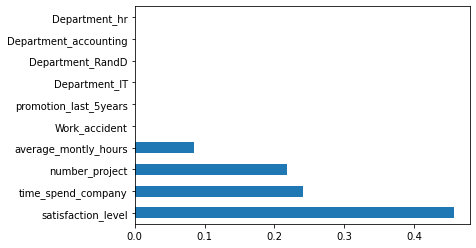

In [117]:
from sklearn import tree

clf = tree.DecisionTreeClassifier(max_depth=3,criterion='entropy')

print(clf)

DTree=clf.fit(X_train,Y_train)
prediction=DTree.predict(X_test)

from sklearn import metrics
print(metrics.classification_report(Y_test, prediction))
print(metrics.confusion_matrix(Y_test, prediction))

F1_Score=metrics.f1_score(Y_test, prediction, average='weighted')
print('Accuracy of the model on Testing Sample Data:', round(F1_Score,2))

%matplotlib inline
feature_importances = pd.Series(DTree.feature_importances_, index=Predictors)
feature_importances.nlargest(10).plot(kind='barh')

from sklearn.model_selection import cross_val_score

Accuracy_Values=cross_val_score(DTree, X , Y, cv=10, scoring='f1_weighted')
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))

# Random Forest

RandomForestClassifier(max_depth=4, n_estimators=200)
              precision    recall  f1-score   support

           0       0.90      0.99      0.95      2853
           1       0.96      0.66      0.78       897

    accuracy                           0.91      3750
   macro avg       0.93      0.83      0.87      3750
weighted avg       0.92      0.91      0.91      3750

[[2830   23]
 [ 303  594]]
Accuracy of the model on Testing Sample Data: 0.91

Accuracy values for 10-fold Cross Validation:
 [0.91997735 0.9016813  0.89903303 0.90807582 0.90718817 0.92082114
 0.90201872 0.91337887 0.91118487 0.91307109]

Final Average Accuracy of the model: 0.91


<AxesSubplot:>

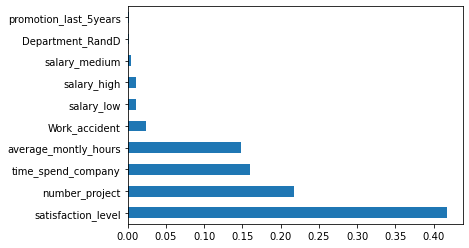

In [118]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(max_depth=4, n_estimators=200,criterion='gini')

print(clf)

RF=clf.fit(X_train,Y_train)
prediction=RF.predict(X_test)

from sklearn import metrics
print(metrics.classification_report(Y_test, prediction))
print(metrics.confusion_matrix(Y_test, prediction))


F1_Score=metrics.f1_score(Y_test, prediction, average='weighted')
print('Accuracy of the model on Testing Sample Data:', round(F1_Score,2))

from sklearn.model_selection import cross_val_score


Accuracy_Values=cross_val_score(RF, X , Y, cv=10, scoring='f1_weighted')
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))

%matplotlib inline
feature_importances = pd.Series(RF.feature_importances_, index=Predictors)
feature_importances.nlargest(10).plot(kind='barh')

In [119]:
#pip install dtreeplt

Note: you may need to restart the kernel to use updated packages.Requirement already satisfied: ipykernel>=4.5.1 in c:\users\dipam\anaconda3\lib\site-packages (from ipywidgets>=7.4.2->dtreeplt) (6.9.1)



# Ada Boost

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=3),
                   learning_rate=0.01, n_estimators=100)
              precision    recall  f1-score   support

           0       0.97      0.98      0.98      2853
           1       0.94      0.91      0.93       897

    accuracy                           0.97      3750
   macro avg       0.96      0.95      0.95      3750
weighted avg       0.96      0.97      0.96      3750

[[2805   48]
 [  83  814]]
Accuracy of the model on Testing Sample Data: 0.96

Accuracy values for 10-fold Cross Validation:
 [0.97180609 0.97099902 0.96574601 0.96796904 0.95923432 0.9697759
 0.9724905  0.96777739 0.93886377 0.9390264 ]

Final Average Accuracy of the model: 0.96


<AxesSubplot:>

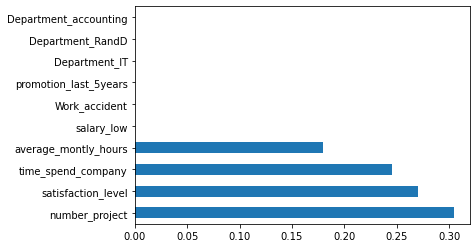

In [121]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
DTC=DecisionTreeClassifier(max_depth=3)
clf = AdaBoostClassifier(n_estimators=100, base_estimator=DTC ,learning_rate=0.01)

print(clf)

AB=clf.fit(X_train,Y_train)
prediction=AB.predict(X_test)

from sklearn import metrics
print(metrics.classification_report(Y_test, prediction))
print(metrics.confusion_matrix(Y_test, prediction))

F1_Score=metrics.f1_score(Y_test, prediction, average='weighted')
print('Accuracy of the model on Testing Sample Data:', round(F1_Score,2))

from sklearn.model_selection import cross_val_score

Accuracy_Values=cross_val_score(AB, X , Y, cv=10, scoring='f1_weighted')
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))


%matplotlib inline
feature_importances = pd.Series(AB.feature_importances_, index=Predictors)
feature_importances.nlargest(10).plot(kind='barh')

# XG Boost

In [128]:
#pip install xgboost

In [127]:
from xgboost import XGBClassifier
clf=XGBClassifier(max_depth=2, learning_rate=0.1, n_estimators=200, booster='gbtree')

print(clf)

XGB=clf.fit(X_train,Y_train)
prediction=XGB.predict(X_test)

from sklearn import metrics
print(metrics.classification_report(Y_test, prediction))
print(metrics.confusion_matrix(Y_test, prediction))

F1_Score=metrics.f1_score(Y_test, prediction, average='weighted')
print('AccuracY of the model on Testing Sample Data:', round(F1_Score,2))

from sklearn.model_selection import cross_val_score

AccuracY_Values=cross_val_score(XGB, X,Y, cv=10, scoring='f1_weighted')
print('\nAccuracY values for 10-fold Cross Validation:\n',AccuracY_Values)
print('\nFinal Average AccuracY of the model:', round(AccuracY_Values.mean(),2))

XGBClassifier(base_score=None, booster='gbtree', callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=2, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=200, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)
              precision    recall  f1-score   support

           0       0.98      0.98      0.98      2853
           1       0.95      0.92      0.93       897

    accuracy                           0.97      3750
   macro avg       0.96      0

# KNN

In [129]:
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors=4)

print(clf)

KNN=clf.fit(X_train,Y_train)
prediction=KNN.predict(X_test)

from sklearn import metrics
print(metrics.classification_report(Y_test, prediction))
print(metrics.confusion_matrix(Y_test, prediction))

F1_Score=metrics.f1_score(Y_test, prediction, average='weighted')
print('AccuracY of the model on Testing Sample Data:', round(F1_Score,2))

from sklearn.model_selection import cross_val_score

AccuracY_Values=cross_val_score(KNN, X , Y, cv=10, scoring='f1_weighted')
print('\nAccuracY values for 10-fold Cross Validation:\n',AccuracY_Values)
print('\nFinal Average AccuracY of the model:', round(AccuracY_Values.mean(),2))

KNeighborsClassifier(n_neighbors=4)
              precision    recall  f1-score   support

           0       0.96      0.97      0.96      2853
           1       0.89      0.87      0.88       897

    accuracy                           0.94      3750
   macro avg       0.93      0.92      0.92      3750
weighted avg       0.94      0.94      0.94      3750

[[2758   95]
 [ 117  780]]
AccuracY of the model on Testing Sample Data: 0.94

AccuracY values for 10-fold Cross Validation:
 [0.94804964 0.95370352 0.93875411 0.93889877 0.92905618 0.94
 0.94622938 0.95240969 0.96029113 0.9576147 ]

Final Average AccuracY of the model: 0.95


# SVM

In [130]:
from sklearn import svm
clf = svm.SVC(C=20, kernel='rbf', gamma=0.01)

print(clf)

SVM=clf.fit(X_train,Y_train)
prediction=SVM.predict(X_test)

from sklearn import metrics
print(metrics.classification_report(Y_test, prediction))
print(metrics.confusion_matrix(Y_test, prediction))

F1_Score=metrics.f1_score(Y_test, prediction, average='weighted')
print('AccuracY of the model on Testing Sample Data:', round(F1_Score,2))

from sklearn.model_selection import cross_val_score

AccuracY_Values=cross_val_score(SVM, X , Y, cv=10, scoring='f1_weighted')
print('\nAccuracY values for 10-fold Cross Validation:\n',AccuracY_Values)
print('\nFinal Average AccuracY of the model:', round(AccuracY_Values.mean(),2))

SVC(C=20, gamma=0.01)
              precision    recall  f1-score   support

           0       0.81      0.97      0.88      2853
           1       0.74      0.29      0.42       897

    accuracy                           0.81      3750
   macro avg       0.77      0.63      0.65      3750
weighted avg       0.79      0.81      0.77      3750

[[2759   94]
 [ 635  262]]
AccuracY of the model on Testing Sample Data: 0.77

AccuracY values for 10-fold Cross Validation:
 [0.84351337 0.80246531 0.8037837  0.80879893 0.80773316 0.81853109
 0.82068363 0.8003842  0.82154305 0.81101905]

Final Average AccuracY of the model: 0.81


# Naive Bayes

In [132]:
#pip install sklearn

  Created wheel for sklearn: filename=sklearn-0.0.post1-py3-none-any.whl size=2959 sha256=2efb9142d806cd7c7ae003c9e1a79017b634b9f0e7a90ab59a19dcd247a9c7ad
  Stored in directory: c:\users\dipam\appdata\local\pip\cache\wheels\f8\e0\3d\9d0c2020c44a519b9f02ab4fa6d2a4a996c98d79ab2f569fa1
Successfully built sklearn
Note: you may need to restart the kernel to use updated packages.


In [134]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB

# GaussianNB is used in Binomial Classification
# MultinomialNB is used in multi-class classification
clf = GaussianNB()
#clf = MultinomialNB()

print(clf)

NB=clf.fit(X_train,Y_train)
prediction=NB.predict(X_test)

from sklearn import metrics
print(metrics.classification_report(Y_test, prediction))
print(metrics.confusion_matrix(Y_test, prediction))

F1_Score=metrics.f1_score(Y_test, prediction, average='weighted')
print('Accuracy of the model on Testing Sample Data:', round(F1_Score,2))

from sklearn.model_selection import cross_val_score

AccuracY_Values=cross_val_score(NB, X , Y, cv=10, scoring='f1_weighted')
print('\nAccuracY values for 10-fold Cross Validation:\n',AccuracY_Values)
print('\nFinal Average AccuracY of the model:', round(AccuracY_Values.mean(),2))

GaussianNB()
              precision    recall  f1-score   support

           0       0.93      0.60      0.73      2853
           1       0.40      0.85      0.54       897

    accuracy                           0.66      3750
   macro avg       0.66      0.73      0.64      3750
weighted avg       0.80      0.66      0.68      3750

[[1713 1140]
 [ 134  763]]
Accuracy of the model on Testing Sample Data: 0.68

AccuracY values for 10-fold Cross Validation:
 [0.62934381 0.67379149 0.68087344 0.66887605 0.6553622  0.67664441
 0.64566251 0.69745136 0.76003067 0.74198049]

Final Average AccuracY of the model: 0.68


# Deployment of the Model

Choosing the best variables for model deployment

In [135]:
TargetVariable='left'
Predictors=[ 'satisfaction_level','number_project', 'average_montly_hours', 'time_spend_company']

In [137]:
X=DataForML_Numeric[Predictors].values
Y=DataForML_Numeric[TargetVariable].values

In [138]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler
PredictorScaler=MinMaxScaler()
PredictorScalerFit=PredictorScaler.fit(X)
X=PredictorScalerFit.transform(X)

print(X.shape)
print(Y.shape)

(14999, 4)
(14999,)


In [140]:
from xgboost import XGBClassifier
clf=XGBClassifier(max_depth=2, learning_rate=0.1, n_estimators=200, booster='gbtree')

FinalXGBModel=clf.fit(X,Y)

In [141]:
from sklearn.model_selection import cross_val_score

Accuracy_Values=cross_val_score(FinalXGBModel, X , Y, cv=10, scoring='f1_weighted')
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))


Accuracy values for 10-fold Cross Validation:
 [0.97004286 0.96974487 0.96403452 0.96868172 0.96270246 0.96992695
 0.96806109 0.96915129 0.97191801 0.97457556]

Final Average Accuracy of the model: 0.97


As the accuracy of the training set & test set are almost similiar so there is no over fitting issue present.

In [142]:
import pickle
import os
with open('FinalXGBModel.pkl', 'wb') as fileWriteStream:
    pickle.dump(FinalXGBModel, fileWriteStream)
    fileWriteStream.close()
    
print('pickle file of Predictive Model is saved at Location:',os.getcwd())

pickle file of Predictive Model is saved at Location: C:\Users\dipam


In [157]:
def FunctionPredictResult(InputData):
    import pandas as pd
    Num_Inputs=InputData.shape[0]
    
    
    DataForML=pd.read_pickle('DataForML.pkl')
    InputData=InputData.append(DataForML)
    
    # Convert  ing the binary nominal variable sex to numeric
    #InputData['left'].replace({0:'Yes':,1:'No'}, inplace=True)
    
    # Generating dummy variables for rest of the nominal variables
    InputData=pd.get_dummies(InputData)
            
    # Maintaining the same order of columns as it was during the model training
    Predictors=['satisfaction_level','number_project', 'average_montly_hours', 'time_spend_company']
    
    # Generating the input values to the model
    X=InputData[Predictors].values[0:Num_Inputs]
    
    # Generating the standardized values of X since it was done while model training also
    X=PredictorScalerFit.transform(X)
    
    # Loading the Function from pickle file
    import pickle
    with open('FinalXGBModel.pkl ', 'rb') as fileReadStream:
        PredictionModel=pickle.load(fileReadStream)
        # Don't forget to close the filestream!
        fileReadStream.close()
            
    # Genrating Predictions
    Prediction=PredictionModel.predict(X)
    PredictionResult=pd.DataFrame(Prediction, columns=['Predicted Status of new data'])
    return(PredictionResult)

In [158]:
hra.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [159]:
NewSampleData=pd.DataFrame(
data=[[0.56,5,225, 8],
     [0.72,2,170,12]],
    
columns=['satisfaction_level','number_project', 'average_montly_hours', 'time_spend_company'])

print(NewSampleData)

FunctionPredictResult(InputData= NewSampleData)

   satisfaction_level  number_project  average_montly_hours  \
0                0.56               5                   225   
1                0.72               2                   170   

   time_spend_company  
0                   8  
1                  12  


,Predicted Status of new data
0,0
1,0
